In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load Dataset

In [3]:
data = loadmat('data/ex8data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
X = data['X']
Xval = data['Xval']
yval = data['yval']
X.shape

(307, 2)

Text(0.5, 1.0, 'Network server statistics')

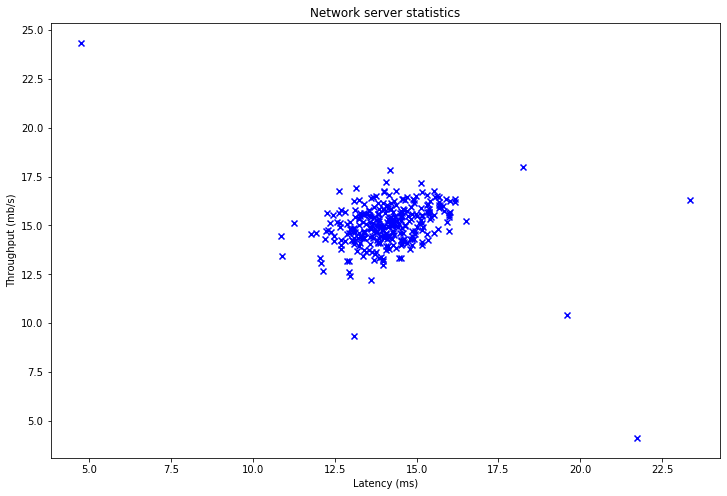

In [5]:
# Visualize the dataset
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c='b', marker='x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Network server statistics')

# Estimate the dataset statistics

In [6]:
from utils import estimate_gaussian

In [7]:
mu, sigma = estimate_gaussian(X)

In [8]:
from utils import multivariate_gaussian

In [9]:
p = multivariate_gaussian(X, mu, sigma)

In [10]:
from utils import visualize_fit

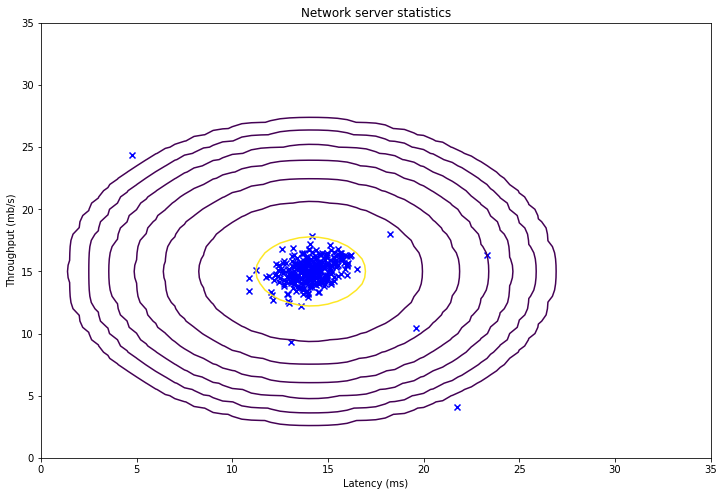

In [11]:
visualize_fit(X, mu, sigma)

# Find Outliers

In [12]:
pval = multivariate_gaussian(Xval, mu, sigma)

In [13]:
from utils import select_threshold

In [14]:
epsilon, F1 = select_threshold(yval, pval)

C:\Users\Kene\Desktop\MLFromScratch\Anomaly Detection\utils.py:61: RuntimeWarning: invalid value encountered in double_scalars
  prec = tp / (tp + fp)


In [15]:
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 303, 304, 305, 306], dtype=int64),
 array([0, 0, 0, 0, 0, 0], dtype=int64))

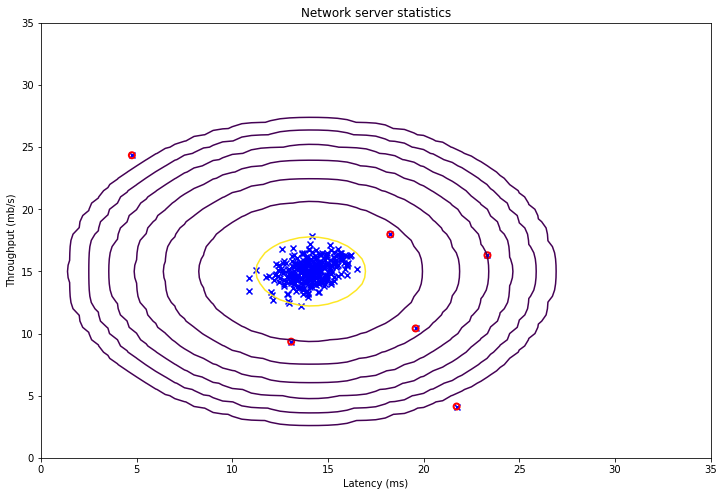

In [16]:
visualize_fit(X, mu, sigma)
plt.scatter(X[outliers[0], 0], X[outliers[0], 1], color='r', marker='o', linewidths=2, facecolors='none')

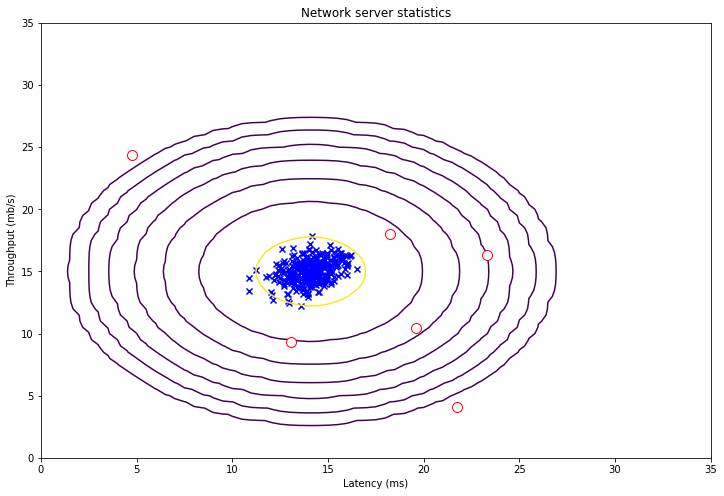

In [17]:
visualize_fit(X, mu, sigma)
plt.plot(X[outliers[0],0],X[outliers[0],1],'o',markeredgecolor='r',markerfacecolor='w',markersize=10.)

# Multidimensional Outliers

In [18]:
data2 = loadmat('data/ex8data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [19]:
X = data2['X']
Xval = data2['Xval']
yval = data2['yval']

In [20]:
mu2, sigma2 = estimate_gaussian(X)
p2 = multivariate_gaussian(X, mu2, sigma2)

In [21]:
pval = multivariate_gaussian(Xval, mu2, sigma2)

In [22]:
epsilon2, F12 = select_threshold(yval, pval)

In [23]:
print(f'Best epsilon found using cross-validation: {epsilon2}')
print(f'Best F1 score on cross-validation set: {F12}')
print(f'Number of outliers found: {sum(p2 < epsilon2)}')

Best epsilon found using cross-validation: 1.3772288907613627e-18
Best F1 score on cross-validation set: 0.6153846153846154
Number of outliers found: [117]
